<a href="https://colab.research.google.com/github/AnvayRaj/MLP-Notes/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline


1.   Steps in ML Projects.
2.   Illustration through practical setup.

# ML Project

Excellent wine company wants to develop ML model for predicting wine quality on certain physiochemical characteristics in order to replace expensive quality sensor.

# Steps in ML Project

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch monitor and maintain your system.


## A few words of wisdom

* ML is usually a small piece in a big project. e.g. wine quality prediction is a small piece in setting up the manufacturing process.
* Typicall 10-15% time is spent on ML.
* A lot more time is spent on capturing and processing data needed for ML and taking decisions based on output of ML module.
* Needs strong collaboration with domain experts, product managers and eng-teams for successful execution.

## Step 1: Looking at the big picture

1. Frame the problem.
  * What is input and output?
  * What is the business objective? How does company expects to use and benifit from the model?
    * Useful in problem framing
    * Algorithm and performance measure selection
    * Overall effort estimation
  * What is the current solution? (if any)
2. Select a performance measure
3. List and check the assumptions


### Design consideration in problem framing

* Is this a supervised, unsupervise or a RL problem?
* Is this a classification, regression or some other task?
* What is the nature of the outputs: single or multiple outputs?
* Does system needs continuous learning or periodic updates?
* What would be the learning style: batch or online?



### Selection of Performance measure

* Regression
  * Mean Squared error (MSE)
  * Mean Absolute error (MAE)
* Classification
  * Precision
  * Recall
  * F1-score
  * Accuracy



### Check the Assumptions

* List down various assumptions about the task.
* Review with domain experts and other teams that plan to consume the ML output.
* Make sure all assumptions are reviewed and approved before coding.

## Step 2: Get the data

* Data spread across multiple tables, files or documents with access control.
* Obtain appropriate access controls and authorizations.
* Get familiarized with data by looking at schema and a few rows. (Familiarity with SQL would be useful here.)

In [ ]:
# Load basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

* Let's first access the data - in this case, we need to download it from the web.
* It is a good practice to create a function for downloading and extracting the data.


In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

* Now that the data is loaded, we need to examine it.

### 2.1 Check data samples

Let's look at few data samples with the head() meathod.


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2 Features

It's a good idea to understand significance of each feature by consulting the experts.


In [ ]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature list:", feature_list)
print("Label:",label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


### 2.3 Data Statistics

Let's use info() method to get quick description of the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Total Entries : 1599 (Tiny dataset by ML standard)
* There are total 12 columns: 11 features + 1 label
  * Label column: quality
  * Features: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
* All columns are numeric (float64) and label is an integer.

In order to understand the nature of the numeric attributes, we use the describe() method.

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* The wine quality can be between 0 and 10, but in this dataset, the quality values are between 3 and 8. Let's look the distribution of examples by the wine quality.

In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

* High quality value -> better quality of wine.
* You can see that there are lots of samples of average wines than good or the poor quality ones.
  * many examples with quality = 5 or 6

This information can be viewed through histogram plot.

* A histogram gives the count of how many samples occure within a specific range. (bins)
* The x-axis denotes the range of values in a feature.
* The y-axis denotes the frequency of samples with those specific values.

Text(0, 0.5, 'Count')

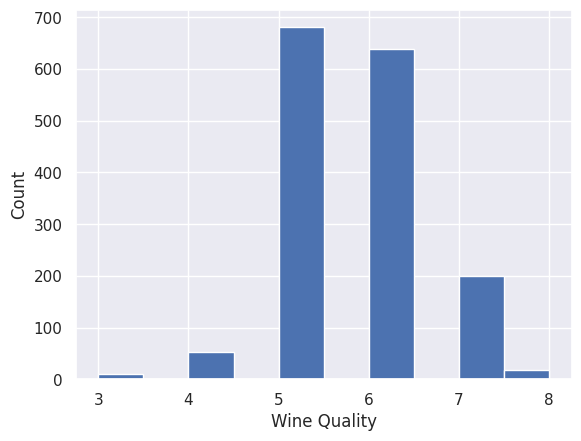

In [ ]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In a similar manner we can plot all numerical attributes with histogram plot for quick examination.

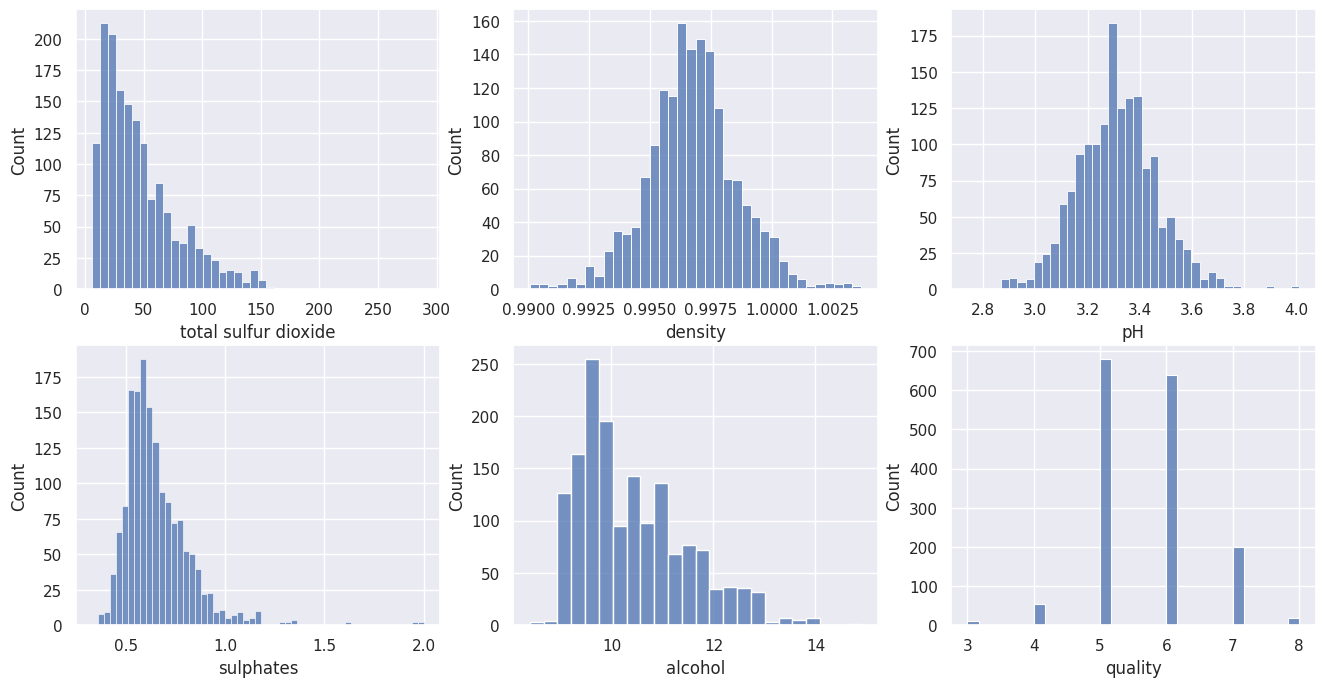

In [ ]:
sns.set()

columns = ['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for ax, column in zip(axes.flatten(), columns):
    sns.histplot(data=data, x=column, ax=ax)

plt.show()

### A few observations based on these plots

1. Features are at different scales.
2. Features have different distributions -
  * A few are tail heavy. e.g. residual sugal, free so2
  * A few have multiple modes. e.g. volatile acidity, citric acid

Before any further evaluation, it's a good idea to separate test set and do not look at it in order to have a clean evaluation set.

### 2.4 Create test set

* When we look at the test set, we are likely to notice patterns in that and based on that we may select certain models.
* This leads to biased estimation on test set, which may not generalize well in practice. This is called **data snooping bias**.

Let's write a function to split the data into training and test. Make sure to set the seed so that we get the same test set in the next run.

In [ ]:
def split_train_test(data, test_ratio):
  # set the random seed.
  np.random.seed(42)

  # shuffle the dataset
  shuffled_indices = np.random.permutation(len(data))

  # calculate the size of the test set
  test_set_size = int(len(data) * test_ratio)

  # split dataset to get training and test sets.
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(data, 0.2)

Scikit-Learn provide a few functions for creating test sets based on

1. **Random Sampling**, which randomly selects k% points in the test set.
2. **Stratified Sampling**, which samples test examples such that they are representative of overall distribution.

###Random Sampling

* train_test_split() function performs random sampling with
  * **random_state** parameter to set the random seed, which ensures that the same examples are selected for test sets across runs.
  * **test_size** parameter to specify the size of the test set.
  * **shuffle_flag** to specify if the data needs to be shuffled before splitting.
* Provision for processing multiple datasets with an identical number of rows and selecting the same indices from these datasets.
  * Useful when the lables are in differen dataframes.

In [ ]:
from sklearn.model_selection import train_test_split

We can read the documentation of this function by using the following line of code:

In [ ]:
?train_test_split

Let's perform random sampling on our dataset:

In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

### Stratified Sampling

* Data distribution may not be uniform in real world data.
* Random sampling - by its nature -  introduces biases in such datasets.

Recall the label distribution in our dataset : it's not uniform!

Text(0, 0.5, 'Count')

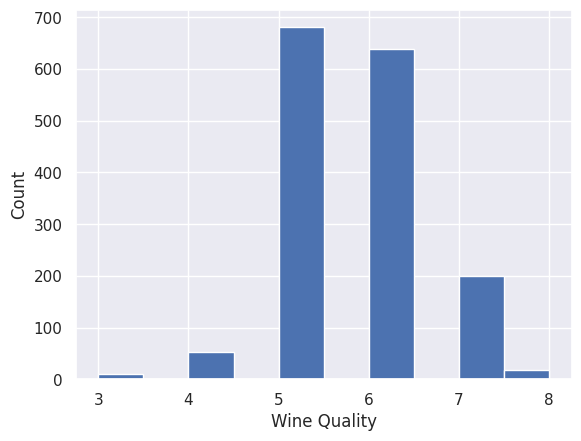

In [ ]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

* Labes 5 and 6 are over-representated, while others are under-representated.
* This causes a problem while random sampling. The test distribution may not match with the overall distribution.

#### How do we sample in such cases?

* We divide the population into homogeneous groups called **strata**.
* Data is sampled from each stratum so as to match it with the overall distribution.
* Scikit-Learn provides a class StratifiedShuffleSplit that helps us in stratified sampling.


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['quality']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

Let's examine the test set distribution by the wine quality that was used for stratified sampling.

In [ ]:
strat_dist = strat_test_set["quality"].value_counts()/len(strat_test_set)

Now compare this with the overall distribution:

In [ ]:
overall_dist = data["quality"].value_counts() / len(data)

Let's look at them side-by-side:

In [ ]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])


You can notice that there is a small difference in each strata.

In [ ]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


Let's contrast this with random sampling

In [ ]:
random_dist = test_set["quality"].value_counts()/ len(test_set)
random_dist

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64

In [ ]:
dist_comparison['random'] = random_dist
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])

##### Sampling Bias Comparison

Compare the difference in distribution of stratified and uniform sampling:

* Stratified sampling gives us test distribution closer to the overall distribution that the random sampling.

In [ ]:
dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

,diff(s-o)_pct,diff(r-o)_pct
5,-0.209251,-4.611784
6,0.250784,3.383621
7,0.439698,5.461683
4,3.708726,-5.719340
8,-16.718750,38.802083
3,-0.062500,-50.031250


In [ ]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct,random,diff(r-o),diff(r-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251,0.406250,-0.019641,-4.611784
6,0.398999,0.400000,0.001001,0.250784,0.412500,0.013501,3.383621
7,0.124453,0.125000,0.000547,0.439698,0.131250,0.006797,5.461683
4,0.033146,0.034375,0.001229,3.708726,0.031250,-0.001896,-5.719340
8,0.011257,0.009375,-0.001882,-16.718750,0.015625,0.004368,38.802083
3,0.006254,0.006250,-0.000004,-0.062500,0.003125,-0.003129,-50.031250


## Step 3: Data Visualization

* Performed on training set.
* In case of large training set -
  * Sample examples to form **exploration set**.
  * Enables to understand features and their relationship among themselves and with output label.

In our case we have a small training data and we use it all for data exploration. There is no need to create a seperate exploration set.

It's a good idea to create a copy of the training set so that we can freely manipulate it without worrying about any manipulation in the original set.

In [ ]:
exploration_set = strat_train_set.copy()

### Scatter Visualization

with seaborn library:

<Axes: xlabel='fixed acidity', ylabel='density'>

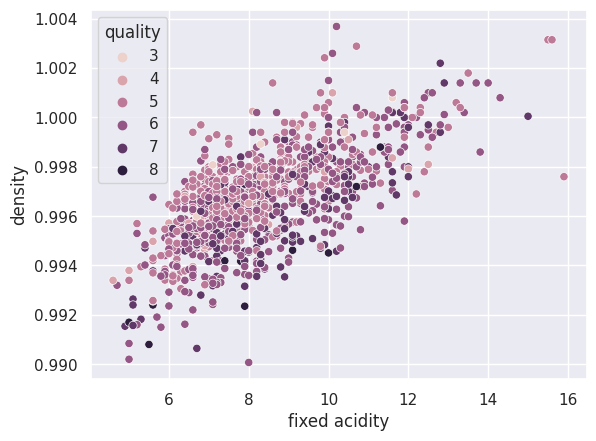

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

with matplotlib:

<Axes: xlabel='fixed acidity', ylabel='density'>

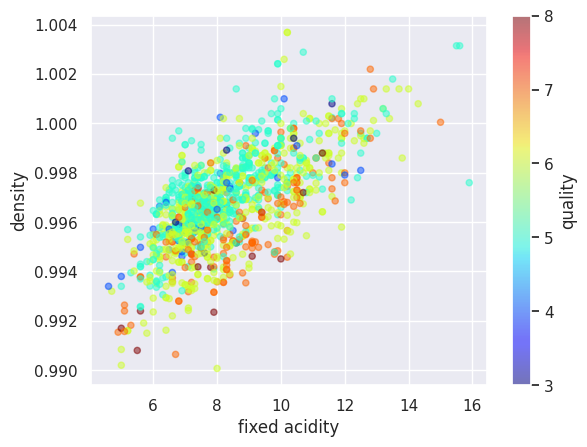

In [ ]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c='quality', cmap=plt.get_cmap('jet'))

### Relationship between features

* **Standard correlation coefficient** between features.
  * Ranges between -1 to +1.
    * **Correlation = +1** : Strong positive correlation between features.
    * **Correlation = -1** : Strong negative correlation between features.
    * **Correlation = 0** : No linear correlation between features.
  * Visualization with heat map.
* Only captures linear relationship between features.
  * For non-linear relationship, use **rank correlation**.

Let's calculate correlation between our features:

In [ ]:
corr_matrix = exploration_set.corr()

Let's checkout features which are correlated with the label, which is quality in our case.

In [ ]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

Notice that **quality** has strong positive correlation with **alcohol** content [0.48] and strong negative correlation with **volatile acidity** [-0.38].

Let's visualize correlation matrix with heatmap:

<Axes: >

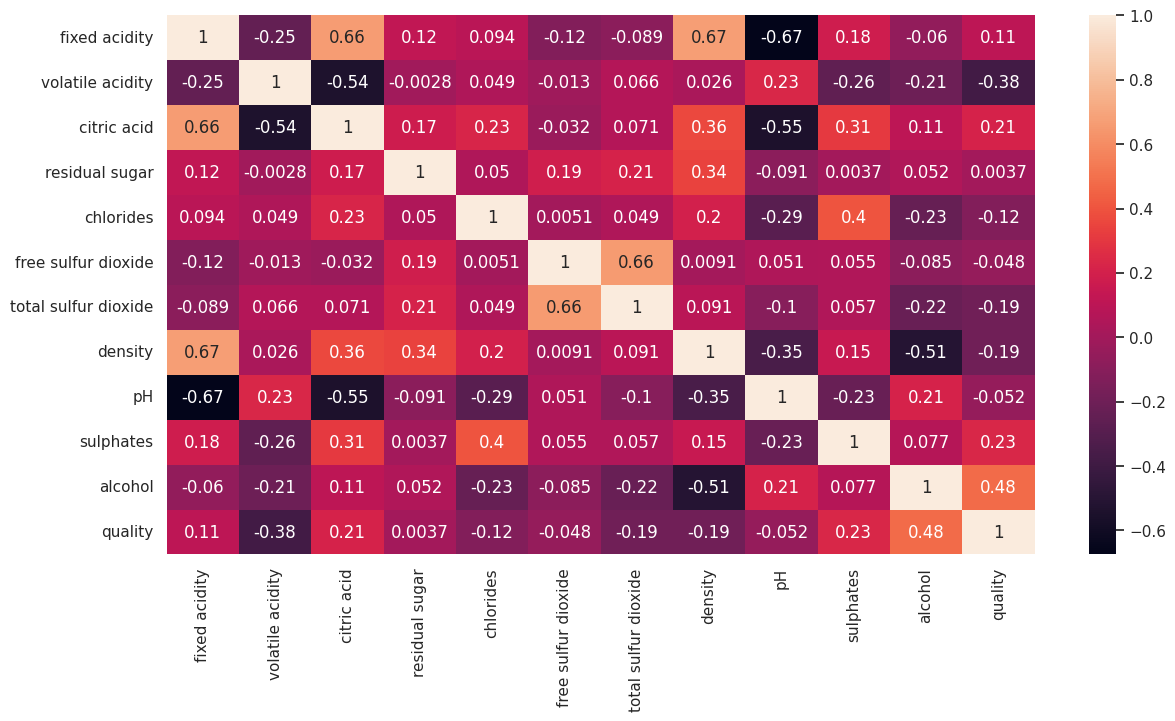

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

#### You can notice:

* The correlation coefficient on diagonals is +1.
* Darker colors represent negative correlations, while fainter colors represent positive correlations. For example
  * citric acid and fixed acidity have strong positive correlation.
  * pH and fixed acidity have strong negative correlation.


Another option to visualize relationships between the features is with scatter matrix.

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

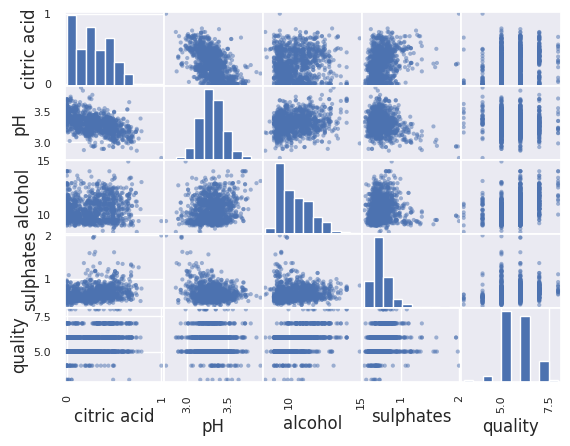

In [ ]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

* Similar analysis can be carried out with combined features - features that are derived from the original features.

### Note of Wisdom

1. Visualization and data exploration do not have to be absolutely thorough.
2. Objective is to get quick insight into features and its relationship with other features and labels.
3. Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.

## Step 4: Prepare data for ML algorithm

We often need to preprocess the data before using it for model building due to variety of reasons:
  * Due to errors in data capture, data may contain outliers or missing values.
  * Different features may be at different scales.
  * The current data distribution is not exactly amenable to learning.

Typical steps in data preprocessing are as follows:
1. Separate features and labels.
2. Handling missing values and outliers.
3. Feature scaling to bring all features on the same scale.
4. Applying certain transformations like log, square root on the features.

It's a good practice to make a copy of the data and apply preprocessing on that copy. This ensures that in case something goes wrong, we will atleast have original copy of the data intact.

### 4.1 Separate features and labels from the training set

In [ ]:
# copy all features, leaving aside the label
wine_features = strat_train_set.drop("quality", axis=1)

# Copy the label list
wine_labels = strat_train_set['quality'].copy()

### 4.2 Data cleaning

Let's first check if there are any missing values in the feature set: One way to find that out is column-wise.

In [ ]:
wine_features.isna().sum() # counts the number of NaN in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In this dataset, we do not have any missing values.

In case, we have non-zero number for any of the above columns, we have a problem of missing values.
  * These values are missing due to errors in recording or they do not exist.
  * If they are not recorded:
    * Use imputation technique to fill up the missing values.
    * Drop the rows containing missing values.
  * If the values do not exist, it is better to keep them as NaN.

Sklearn provides the following methods to drop rows containing missing values:
* dropna()
* drop()

It provides SimpleImputer class for filling up missing values with, say, median value.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

The strategy contains instructions as how to replace the missing values. In this case, we specify that the missing value should be replaced by median value.

In [ ]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In case the features contain non-numeric attributes, they need to be dropped before calling the fit method on imputer object.

Let's check the statistics learnt by the imputer on the training set:

In [ ]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Note that these are median values for each feature. We can cross-check it by calculating median on the feature set:

In [ ]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

Finally we use the trained imputer to transform the training set such that the missing values are replaced by the medians:

In [ ]:
tr_features = imputer.transform(wine_features)

This returns a numpy array and we can convert it to the dataframe if needed:

In [ ]:
tr_features.shape

(1279, 11)

In [ ]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


### 4.3 Handling text and Categorical attributes

#### 4.3.1 Converting categories to numbers

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

* Call fit_transform() method on ordinal_encoder object to convert text to numbers.
* The list of categories can be obtained via categories_ instance variable.

One issue with this representation is that ML algorithm would assume that the two nearby values are closer than the distinct ones.

#### 4.3.2 Using one hot encoding

* Here we can create one binary feature per category - the feature value is 1 when the category is present else it is 0.
* Only one feature is 1 (hot) and the rest are 0 (cold).
* The new features are referred to as dummy features.
* Scikit-Learn provides OneHotEncoder class to convert categorical values into one-hot vectors.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

* We need to call fit_transform() method on OneHotEncoder object.
* The output is SciPy sparse matrix rather than NumPy array. This enables us to save space when we have a huge number of categories.
* In case we want to convert it into dense representation, we can do so with toarray() method.
* The list of categories can be obtained via categories_ instance variable.


* As we observed that when the number of categories are very large, the one-hot encoding would result in very large number of features.
* This can be addressed with one of the following approaches:
  * Replace with categorical numerical features.
  * Convert into low-dimentional learnable vectors called embeddings.

### 4.4 Feature Scaling

* Most ML algorithms do not perform well when input features are on very different scales.
* Scaling of Target label is generally not required.

#### 4.5.1 Min-Max Scaling or Normalization

* We subtract minimum value of a feature from the current value and divide it by the difference between the minimum and the maximum value of that feature.
* The values are shifted and scaled so that they range between 0 and 1.
* Scikit-Learn provides MinMaxScaler transformer for this.
* One can specify hyperparameter feature_range to specify the range of the feature.

4.5.2 Standardization

* We subtract mean value of each feature from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.
* While normalization bounds values between 0 and 1, standardization does not bound values to a specific range.
* Standardization is less affected by the outliers compared to the normalization.
* Scikit-Learn provides StandardScaler transformation for feature standardization.
* Note that all these transformers are learnt on the **training data** and then applied on the training and test data to transform them.
* **Never learn these transformers on the full dataset.**


#### Transformation Pipeline

* Scikit-Learn provides a Pipeline class to line up transformations in an intended order.

Here is an example of pipeline:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

Let's understand what is happening here:

* Pipeline has a sequence of transformations - missing value imputations followed by standardization.
* Each step in the sequence is defined by name, estimator pair.
* Each name should be unique and shouldn't contain __ (double underscore).
* The output of one step is passed on the next one in sequence until it reaches the last step.
  * Here the pipeline first performes imputation of missing values and its result is passed for standardization.
* The pipeline exposes the same method as the final estimator.
  * Here StandardScaler is the last estimator and since it is a transformer we call fit_transform() method on the Pipeline object.

#### How to transform mixed features?

* The real world data has both categorical as well as numerical features and we need to apply different features to them.
* Scikit-Learn introduces ColumnTransformer for this purpose.

In [ ]:
from sklearn.compose import ColumnTransformer

In our dataset, we do not have features of mixed types. All our features are numeric.

For illustration purposes, here is an example code snippet:

In [ ]:
# num_attributes =  list(wine_features)
# cat_attributes = ["place_of_manufacturing"]
# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attributes),
#     ("cat", OneHotEncoder(), cat_attributes),
# ])
# wine_features_tr = full_pipeline.fit_transform(wine_features)

* Here we apply num_pipeline on numerical features and OneHotEncoder on the categorical features.
* The ColumnTransformer applies each transformation to the appropriate columns and then concatenates the outputs along the columns.
* Note that all the transformers must return the same number of rows.
* The numeric transformers return dense matrix while the categorical transformeres return sparse matrix. The ColumnTransformer automatically determines the type of the output based on the density of the resulting matrix.

## Step 5: Select and train ML model

It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

Now that we have a working model of a regression, let's evaluate the performance of the model on training as well as test sets.
* For regression models we use mean squared error as an evaluation measure.

In [ ]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

Let's evaluate the performance on the test set.

* We need to first apply transformation on the test set and then apply the model prediction function.

In [ ]:
# copy all features leaving aside the label
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501518

Let's visualize the error between the actual and predicted values.

Text(0.5, 0, 'Predicted Quality')

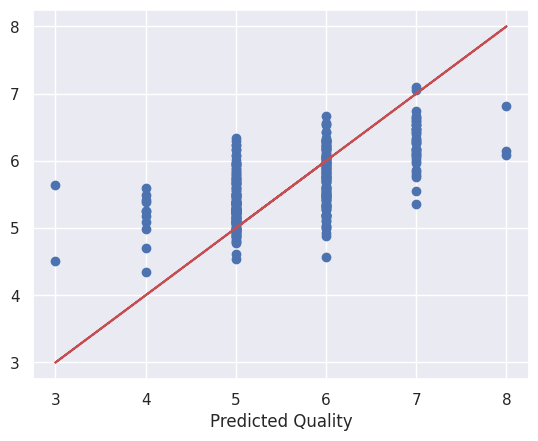

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual Quality')
plt.xlabel('Predicted Quality')

The model seems to be making errors on the best and poor quality wines.

Let's try another model: DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

Notice Similarity between two code snippets:

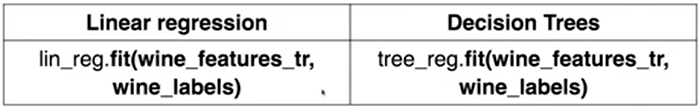

In [ ]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [ ]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.58125

Note that the training error is 0, while the test error is 0.58. This is an example of an overfitted model.

Text(0.5, 0, 'Predicted Quality')

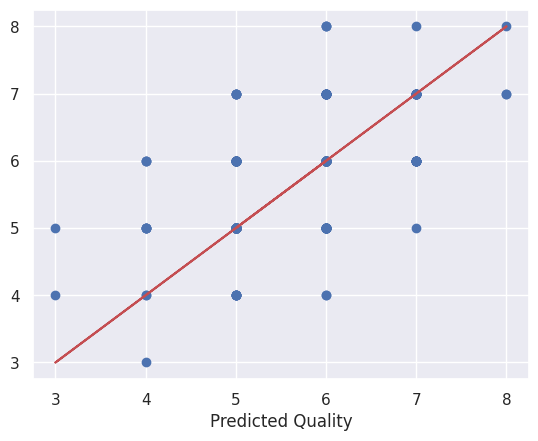

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel("Actual Quality")
plt.xlabel("Predicted Quality")

We can use cross-validation (CV) for robust evaluation of model performance.

In [ ]:
from sklearn.model_selection import cross_val_score

* Cross validation provides a separate MSE for each validation set, which we can use to get a mean estimation of MSE as well as the standard deviation, which helps us to determine how precise is the estimate.

* The additional cost we pay in cross validation is additional training runs, which may be too expensive in certain cases.

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())

#### Linear Regression CV

In [ ]:
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard Deviation: 0.08356359730413969


#### Decision Tree CV

In [ ]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean: 0.6852177657480315
Standard Deviation: 0.16668343331737054


Let's compare scores of Linear regression (LinReg) and Decision Tree (DT) regression:

* LinReg has better MSE and more precise estimation compared to DT.

#### Random Forest CV

* Random forest model builds multiple decision trees on randomly selected features and then average their predictions.
* Building a model on top of other model is called ensemble learning, which is often used to improve performance of ML models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.37479531 0.41515391 0.28385469 0.30880313 0.22379219 0.30653281
 0.27287344 0.39437266 0.43765547 0.45132441]
Mean: 0.3469158003198819
Standard Deviation: 0.0738393294683144


In [ ]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.33234187499999995

Text(0.5, 0, 'Predicted Quality')

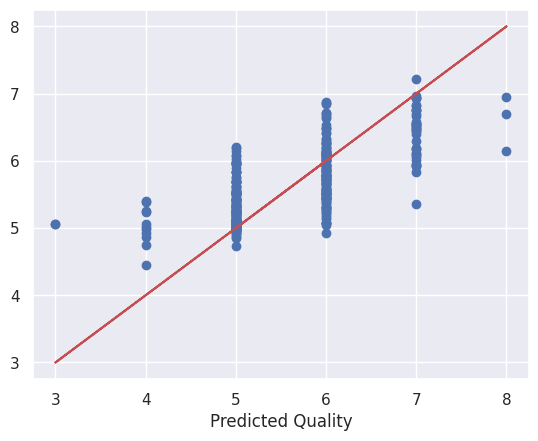

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel("Actual Quality")
plt.xlabel("Predicted Quality")

Random Forest looks more promising than the other two models.

* It's a good practice to build a few such models quickly without tuning their hyperparameters and shortlist a few promising models among them.

* Also save the models to the disk in Python pickle format.

#### What to do next?

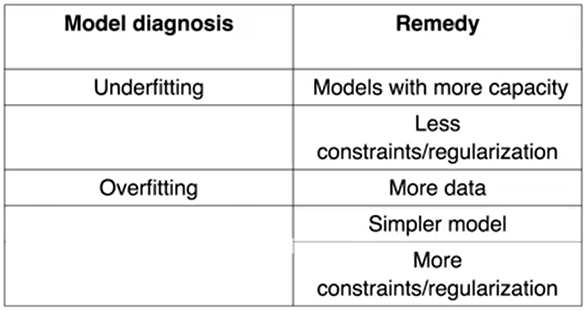

## Step 6: Finetune your model

* Usually there are a number of hyperparameters in the model, which are set manually.
* Tuning these hyperparameters lead to better accuracy of ML models.
* Finding the best combination of hyperparameters is a search problem in the space of hyperparameters, which is huge.

#### Grid Search

* Scikit-Learn provides a class GridSearchCV that helps us in this persuit.

In [ ]:
from sklearn.model_selection import GridSearchCV

* We need to specify a list of hyperparameters and a range of values to try.
* It automatically evaluates all possible combinations of hyperparameter values using cross-validation.

For example there are a number of hyperparameters in RandomForestRegression such as:
  * Number of estimators
  * Maximum number of features

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]


Here the parameter grid contains two combinations:
1. The first combination contains n_estimators with 3 values and max_features with 4 values.
2. The second combination has an additional bootstrap parameter, which is set to False. Note that it was set to its default value, which is True, in the first grid.

Let's compute the total combinations evaluated here:

1. The first one results in 3 x 4 = 12 combinations.
2. The second one has 2 values of n_estimators and 3 values of max_features, thus resulting in 2 x 3 = 6 in total of values.

The total number of combinations evaluated by the parameter grid is 12 + 6 = 18.


Let's create an object of GridSearchCV:

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

* In this case we set cv=5 i.e. using 5 fold cross validation for training the model.
* We need to train the model for 18 parameter combinations and each combination would be trained 5 times as we are using cross-validation here.
* The total model training runs = 18 x 5 = 90.

Let's Launch the hyperparameter search:

In [ ]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best parameter combination can be obtained as follows:

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

Let's find out errors at different parameter settings:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(-mean_score, params)

0.4724611928104574 {'max_features': 2, 'n_estimators': 3}
0.3946850183823529 {'max_features': 2, 'n_estimators': 10}
0.36529637459150327 {'max_features': 2, 'n_estimators': 30}
0.4841244553376905 {'max_features': 4, 'n_estimators': 3}
0.3801683517156863 {'max_features': 4, 'n_estimators': 10}
0.3545375306372549 {'max_features': 4, 'n_estimators': 30}
0.4780218545751634 {'max_features': 6, 'n_estimators': 3}
0.38888373161764705 {'max_features': 6, 'n_estimators': 10}
0.36072821691176465 {'max_features': 6, 'n_estimators': 30}
0.4746435866013071 {'max_features': 8, 'n_estimators': 3}
0.3910532169117646 {'max_features': 8, 'n_estimators': 10}
0.3657137186819172 {'max_features': 8, 'n_estimators': 30}
0.44001702069716775 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3942317708333333 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.44911254084967317 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.37649304534313727 {'bootstrap': False, 'max_features':

As you can notice, the lowest MSE is obtained for the best parameter combination.

Let's obtain the best estimator as follows:

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

**Note** : GridSearchCV is initialized with refit=True option, which retrains the best estimator on full training set. This is likely to lead us to a better model as it is trained on a larger dataset.

#### Randomized Search

* When we have a large parameter space, it is desirable to try RandomizedSearchCV.
* It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.
* It enables us to search hyperparameter space with appropriate budget control.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Analysis of best model and its errors

Analysis of the model provides useful insights about features. Let's obtain the feature importance as learnt by the model:

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.22449868914143806, 'alcohol'),
 (0.13900397870370917, 'sulphates'),
 (0.1234711647213308, 'volatile acidity'),
 (0.07732997265093207, 'density'),
 (0.07547212573991444, 'total sulfur dioxide'),
 (0.06610196137269372, 'chlorides'),
 (0.06250384677897107, 'pH'),
 (0.061414070449271066, 'citric acid'),
 (0.06118809778073658, 'fixed acidity'),
 (0.05885908751269257, 'residual sugar'),
 (0.05015700514831057, 'free sulfur dioxide')]

* Based on this information, we may drop features that are not so important.
* It is also useful to analyse the errors in prediction and understand its causes and fix them.

#### Evaluation on test set

Now that we have a reasonable model, we evaluate its performance on the test set. The following steps are involved in the process:


1. Transform the test features

In [ ]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set["quality"].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the test set

In [ ]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics.

In [ ]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.36201041666666667

4. It's a good idea to get 95% confidence interval of the evaluation metric. It can be obtained by the following code:

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test)**2
stats.t.interval(confidence, len(squared_errors)-1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors))

(0.2997374956823811, 0.4242833376509522)

## Step 7: Present Your Solution

Once we have satisfactory model based on its performance on the test set, we reach the prelaunch phase.

> Before launch,
1. We need to present our solution that highlights learnings, assumptions and system limitations.
2. Document everything, create clear visualizations and present the model.
3. In case the model doesn't work better than the experts, it may still be a good idea to launch it and free up bandwidths of human experts.

## Step 8: Launch, Monitor and Manintain your system

> Launch
* Plug in input sources and
* Write test cases

> Monitoring
* System outages
* Degradation of model performance
* Sampling predictions for human evaluation
* Regular assessment of data quality, which is critical for model performance

> Maintainance
* Train model regularly every fixed interval with fresh data.
* Production roll out of the model.

# Introduction to Scikit-Learn (sklearn)

sklearn API are organized on the lines of our ML framework.

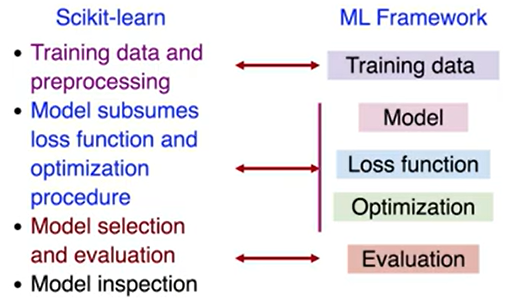

## API Design Princilpes

sklearn APIs are well designed with the following principles:
* **Consistency**: All APIs share a simple and consistent interface.
* **Inspection**: The learnable parameters as well as hyperparameters of all estimators are accessible directly via public instance variables.
* **Non-proliferation of classes**: Datasets are represented as Numpy arrays or scipy sparse matrix instead of custom designed classes.
* **Composition**: Existing buliding blocks are reduced as much as possible.
* **Sensible default** values are used for parameters that enables quick baseline building.

### Types of sklearn objects

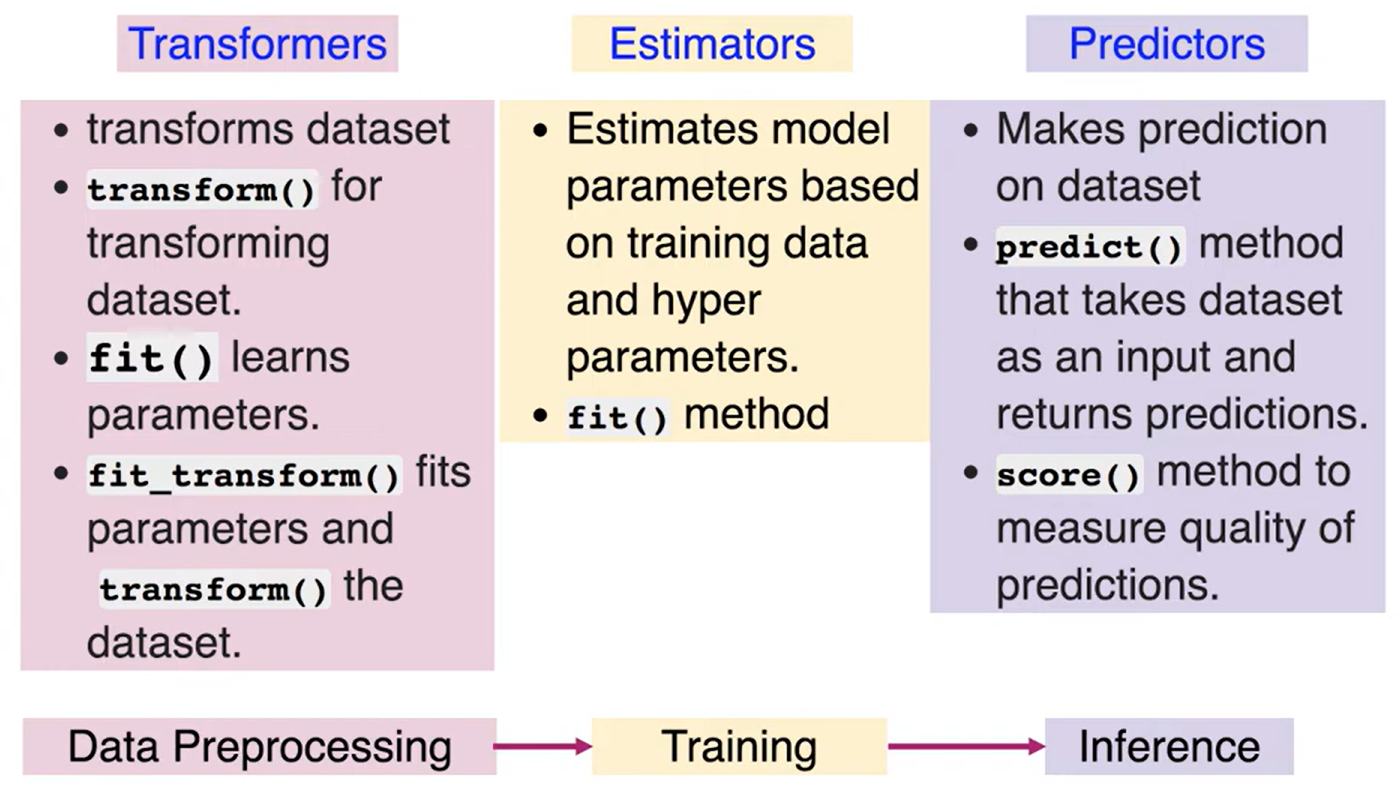

## sklearn API

### Data API

Provides functionality for loading, generating and preprocessing the training and test data.

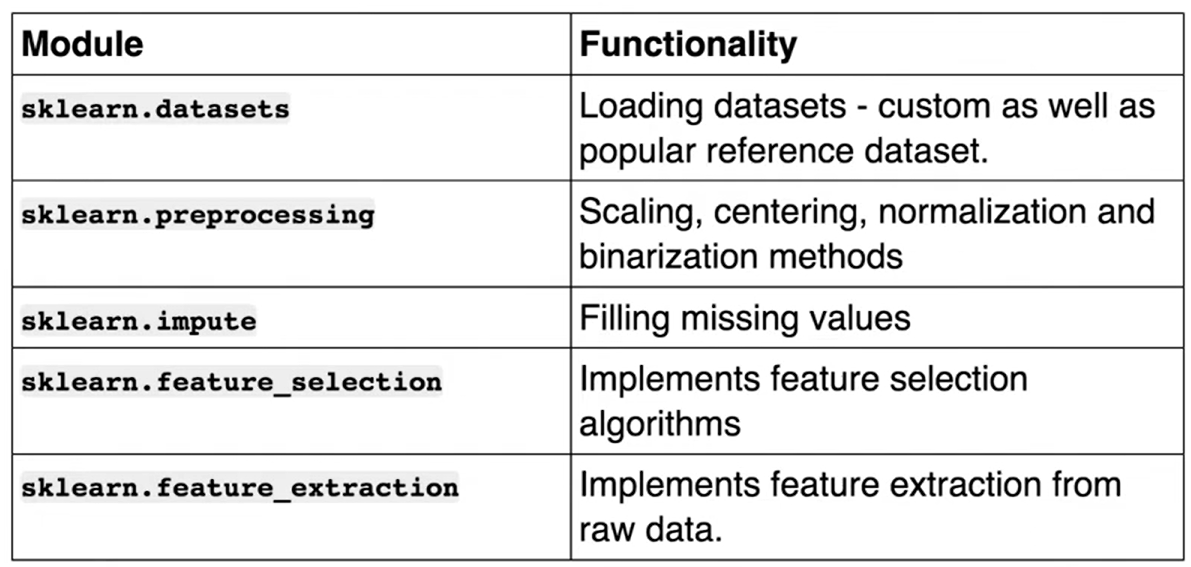

### Model API

Implements supervised and unsupervised models

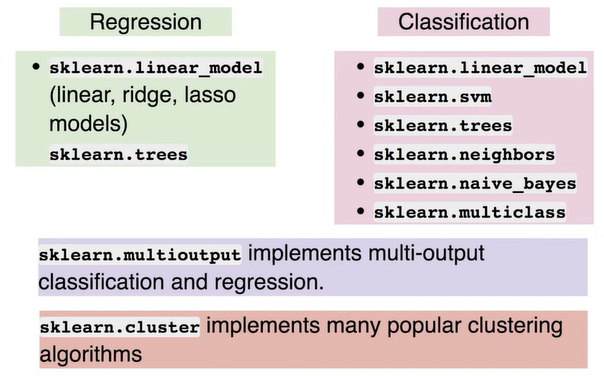

### Model Evaluation API

`sklearn.metrics` implements different metrics for model evaluation.
* Classification metrics
* Regression metrics
* Clustering metrics

### Model Selection API

`sklearn.model_selection` various model selection stratergies like cross-validation, tuning hyperparameters and plotting learning curves.

### Model Inspection API

`sklearn.model_inspection` includes tools for model inspection.

## Practical Advice

* It is not possible to learn each and every sklearn API.
* Remember high level modules and API design principles.
* Use documentation for more information as follows:

In [ ]:
from sklearn.linear_model import LogisticRegression
?LogisticRegression

* Keep following links handy:
  * [API Reference](https://scikit-learn.org/stable/modules/classes.html)
  * [sklearn user guide](https://scikit-learn.org/stable/user_guide.html)
  * [Worked examples](https://scikit-learn.org/stable/auto_examples/index.html)

# Data Loading

General dataset API has 3 main kinds of interfaces:

* The dataset **loaders** are used to load toy datasets bundeled with sklearn.
* The dataset **fetchers** are used to download and load datasets from the internet.
* The dataset **generators** are used to generate controlled synthetic datasets.

## Dataset API

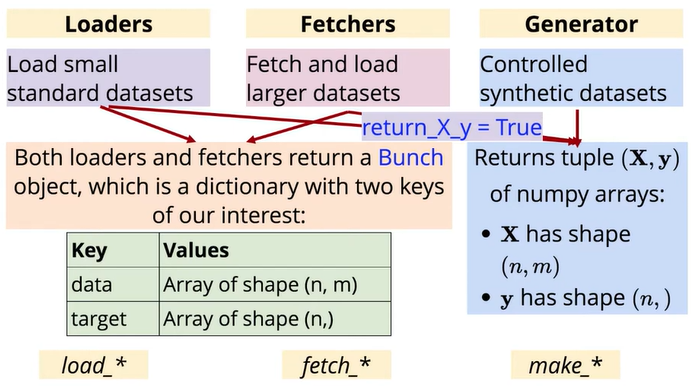

### Dataset Loaders

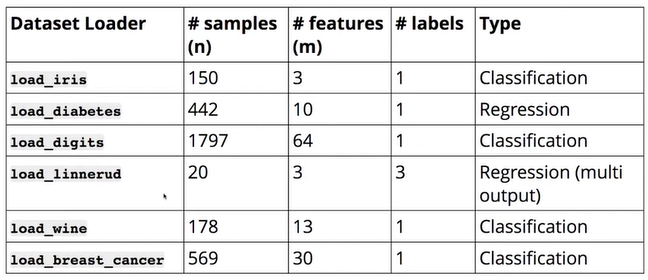

Note: These datasets are bundeled with sklearn and we do not require to download them from external sources.

### Dataset Fetchers

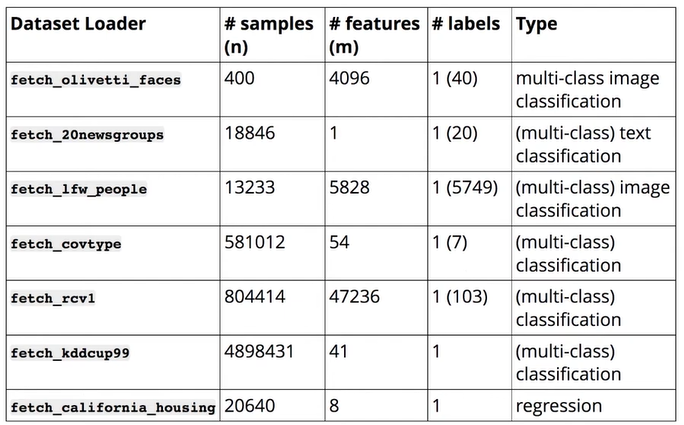

### Dataset Generators

**Regression**
> `make_regression()` produces regression targets as a sparse random linear combination of random features with noise. The informative features are either uncorrelated or low rank.

**Classification**
> Single label
>> `make_blobs()` and `make_classification()` first creates a bunch of normally-distributed clusters of points and then assigns one or more clusters to each class thereby creating multi-class datasets.

> Multi label
>> `make_multilabel_classification()` generates random samples with multiple labels with a specific generative process and rejection sampling.

**Clustering**
> `make_blobs()` generates a bunch of normally distributed clusters of points with specific mean and standard deviations for each cluster.

### Loading external datasets

* `fetch_openml()` fetches datasets from openml.org, which is a public repository for machine learning data and experiments.
* `pandas.io` provides tools to read from common formats like CSV, excel, json, SQL.
* `scipy.io` specializes in binary formats used in scientific computing like .mat and .arff.
* `numpy/routines.io` specializes in loading columnar data into numpy arrays.
* `dataset.load_files` loads directories of text files where directory name is a label and each file is a sample.
* `datasets.load_svmlight_files()` loads data in svmlight and libsvm sparse format.
* `skimage.io` provides tools to load images and videos in numpy arrays.
* `scipy.io.wavfile.read` specializes reading WAV file into a numpy array.

For managing numerical data, sklearn recommends using an optimized file format such as HDF5 (Hierarchical Data Format version 5) to reduce data load times.

Pandas, PyTables and H5Py provides an interface to read and write data in that format.